Define circuits and take statistics from HIV_2007 paper:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("png", "pdf", "svg")

matplotlib.style.use('ggplot')
%matplotlib inline

class Genotype:
    mean_value = 0.0
    min_value = 0.0
    Q1_value = 0.0
    median_value = 0.0
    Q3_value = 0.0
    max_value = 0.0

class Circuit:
    mean_value = 0.0
    min_value = 0.0
    Q1_value = 0.0
    median_value = 0.0
    Q3_value = 0.0
    max_value = 0.0

def a(a000: Genotype, a001: Genotype, a010: Genotype, a011: Genotype, a100: Genotype, a101: Genotype, a110: Genotype, a111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = a000.mean_value - a010.mean_value - a100.mean_value + a111.mean_value
    output.min_value = a000.min_value - a010.min_value - a100.min_value + a111.min_value
    output.Q1_value = a000.Q1_value - a010.Q1_value - a100.Q1_value + a111.Q1_value
    output.median_value = a000.median_value - a010.median_value - a100.median_value + a111.median_value
    output.Q3_value = a000.Q3_value - a010.Q3_value - a100.Q3_value + a111.Q3_value
    output.max_value = a000.max_value - a010.max_value - a100.max_value + a111.max_value
    return output

def b(b000: Genotype, b001: Genotype, b010: Genotype, b011: Genotype, b100: Genotype, b101: Genotype, b110: Genotype, b111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = b001.mean_value - b011.mean_value - b101.mean_value + b111.mean_value
    output.min_value = b001.min_value - b011.min_value - b101.min_value + b111.min_value
    output.Q1_value = b001.Q1_value - b011.Q1_value - b101.Q1_value + b111.Q1_value
    output.median_value = b001.median_value - b011.median_value - b101.median_value + b111.median_value
    output.Q3_value = b001.Q3_value - b011.Q3_value - b101.Q3_value + b111.Q3_value
    output.max_value = b001.max_value - b011.max_value - b101.max_value + b111.max_value
    return output

def c(c000: Genotype, c001: Genotype, c010: Genotype, c011: Genotype, c100: Genotype, c101: Genotype, c110: Genotype, c111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = c000.mean_value - c001.mean_value - c100.mean_value + c101.mean_value
    output.min_value = c000.min_value - c001.min_value - c100.min_value + c101.min_value
    output.Q1_value = c000.Q1_value - c001.Q1_value - c100.Q1_value + c101.Q1_value
    output.median_value = c000.median_value - c001.median_value - c100.median_value + c101.median_value
    output.Q3_value = c000.Q3_value - c001.Q3_value - c100.Q3_value + c101.Q3_value
    output.max_value = c000.max_value - c001.max_value - c100.max_value + c101.max_value
    return output

def d(d000: Genotype, d001: Genotype, d010: Genotype, d011: Genotype, d100: Genotype, d101: Genotype, d110: Genotype, d111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = d010.mean_value - d011.mean_value - d110.mean_value + d111.mean_value
    output.min_value = d010.min_value - d011.min_value - d110.min_value + d111.min_value
    output.Q1_value = d010.Q1_value - d011.Q1_value - d110.Q1_value + d111.Q1_value
    output.median_value = d010.median_value - d011.median_value - d110.median_value + d111.median_value
    output.Q3_value = d010.Q3_value - d011.Q3_value - d110.Q3_value + d111.Q3_value
    output.max_value = d010.max_value - d011.max_value - d110.max_value + d111.max_value
    return output

def e(e000: Genotype, e001: Genotype, e010: Genotype, e011: Genotype, e100: Genotype, e101: Genotype, e110: Genotype, e111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = e000.mean_value - e001.mean_value - e010.mean_value + e011.mean_value
    output.min_value = e000.min_value - e001.min_value - e010.min_value + e011.min_value
    output.Q1_value = e000.Q1_value - e001.Q1_value - e010.Q1_value + e011.Q1_value
    output.median_value = e000.median_value - e001.median_value - e010.median_value + e011.median_value
    output.Q3_value = e000.Q3_value - e001.Q3_value - e010.Q3_value + e011.Q3_value
    output.max_value = e000.max_value - e001.max_value - e010.max_value + e011.max_value
    return output

def f(f000: Genotype, f001: Genotype, f010: Genotype, f011: Genotype, f100: Genotype, f101: Genotype, f110: Genotype, f111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = f100.mean_value - f101.mean_value - f110.mean_value + f111.mean_value
    output.min_value = f100.min_value - f101.min_value - f110.min_value + f111.min_value
    output.Q1_value = f100.Q1_value - f101.Q1_value - f110.Q1_value + f111.Q1_value
    output.median_value = f100.median_value - f101.median_value - f110.median_value + f111.median_value
    output.Q3_value = f100.Q3_value - f101.Q3_value - f110.Q3_value + f111.Q3_value
    output.max_value = f100.max_value - f101.max_value - f110.max_value + f111.max_value
    return output

def g(g000: Genotype, g001: Genotype, g010: Genotype, g011: Genotype, g100: Genotype, g101: Genotype, g110: Genotype, g111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = g000.mean_value - g100.mean_value - g011.mean_value + g111.mean_value
    output.min_value = g000.min_value - g100.min_value - g011.min_value + g111.min_value
    output.Q1_value = g000.Q1_value - g100.Q1_value - g011.Q1_value + g111.Q1_value
    output.median_value = g000.median_value - g100.median_value - g011.median_value + g111.median_value
    output.Q3_value = g000.Q3_value - g100.Q3_value - g011.Q3_value + g111.Q3_value
    output.max_value = g000.max_value - g100.max_value - g011.max_value + g111.max_value
    return output

def h(h000: Genotype, h001: Genotype, h010: Genotype, h011: Genotype, h100: Genotype, h101: Genotype, h110: Genotype, h111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = h001.mean_value - h010.mean_value - h101.mean_value + h110.mean_value
    output.min_value = h001.min_value - h010.min_value - h101.min_value + h110.min_value
    output.Q1_value = h001.Q1_value - h010.Q1_value - h101.Q1_value + h110.Q1_value
    output.median_value = h001.median_value - h010.median_value - h101.median_value + h110.median_value
    output.Q3_value = h001.Q3_value - h010.Q3_value - h101.Q3_value + h110.Q3_value
    output.max_value = h001.max_value - h010.max_value - h101.max_value + h110.max_value
    return output

def i(i000: Genotype, i001: Genotype, i010: Genotype, i011: Genotype, i100: Genotype, i101: Genotype, i110: Genotype, i111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = i000.mean_value - i010.mean_value - i101.mean_value + i111.mean_value
    output.min_value = i000.min_value - i010.min_value - i101.min_value + i111.min_value
    output.Q1_value = i000.Q1_value - i010.Q1_value - i101.Q1_value + i111.Q1_value
    output.median_value = i000.median_value - i010.median_value - i101.median_value + i111.median_value
    output.Q3_value = i000.Q3_value - i010.Q3_value - i101.Q3_value + i111.Q3_value
    output.max_value = i000.max_value - i010.max_value - i101.max_value + i111.max_value
    return output

def j(j000: Genotype, j001: Genotype, j010: Genotype, j011: Genotype, j100: Genotype, j101: Genotype, j110: Genotype, j111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = j001.mean_value - j100.mean_value - j011.mean_value + j110.mean_value
    output.min_value = j001.min_value - j100.min_value - j011.min_value + j110.min_value
    output.Q1_value = j001.Q1_value - j100.Q1_value - j011.Q1_value + j110.Q1_value
    output.median_value = j001.median_value - j100.median_value - j011.median_value + j110.median_value
    output.Q3_value = j001.Q3_value - j100.Q3_value - j011.Q3_value + j110.Q3_value
    output.max_value = j001.max_value - j100.max_value - j011.max_value + j110.max_value
    return output

def k(k000: Genotype, k001: Genotype, k010: Genotype, k011: Genotype, k100: Genotype, k101: Genotype, k110: Genotype, k111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = k000.mean_value - k001.mean_value - k110.mean_value + k111.mean_value
    output.min_value = k000.min_value - k001.min_value - k110.min_value + k111.min_value
    output.Q1_value = k000.Q1_value - k001.Q1_value - k110.Q1_value + k111.Q1_value
    output.median_value = k000.median_value - k001.median_value - k110.median_value + k111.median_value
    output.Q3_value = k000.Q3_value - k001.Q3_value - k110.Q3_value + k111.Q3_value
    output.max_value = k000.max_value - k001.max_value - k110.max_value + k111.max_value
    return output

def l(l000: Genotype, l001: Genotype, l010: Genotype, l011: Genotype, l100: Genotype, l101: Genotype, l110: Genotype, l111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = l010.mean_value - l100.mean_value - l011.mean_value + l101.mean_value
    output.min_value = l010.min_value - l100.min_value - l011.min_value + l101.min_value
    output.Q1_value = l010.Q1_value - l100.Q1_value - l011.Q1_value + l101.Q1_value
    output.median_value = l010.median_value - l100.median_value - l011.median_value + l101.median_value
    output.Q3_value = l010.Q3_value - l100.Q3_value - l011.Q3_value + l101.Q3_value
    output.max_value = l010.max_value - l100.max_value - l011.max_value + l101.max_value
    return output

def m(m000: Genotype, m001: Genotype, m010: Genotype, m011: Genotype, m100: Genotype, m101: Genotype, m110: Genotype, m111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = -2*m000.mean_value + m001.mean_value + m010.mean_value + m100.mean_value - m111.mean_value
    output.min_value = -2*m000.min_value + m001.min_value + m010.min_value + m100.min_value - m111.min_value
    output.Q1_value = -2*m000.Q1_value + m001.Q1_value + m010.Q1_value + m100.Q1_value - m111.Q1_value
    output.median_value = -2*m000.median_value + m001.median_value + m010.median_value + m100.median_value - m111.median_value
    output.Q3_value = -2*m000.Q3_value + m001.Q3_value + m010.Q3_value + m100.Q3_value - m111.Q3_value
    output.max_value = -2*m000.max_value + m001.max_value + m010.max_value + m100.max_value - m111.max_value
    return output

def n(n000: Genotype, n001: Genotype, n010: Genotype, n011: Genotype, n100: Genotype, n101: Genotype, n110: Genotype, n111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = -n000.mean_value + n011.mean_value + n101.mean_value + n110.mean_value - 2*n111.mean_value
    output.min_value = -n000.min_value + n011.min_value + n101.min_value + n110.min_value - 2*n111.min_value
    output.Q1_value = -n000.Q1_value + n011.Q1_value + n101.Q1_value + n110.Q1_value - 2*n111.Q1_value
    output.median_value = -n000.median_value + n011.median_value + n101.median_value + n110.median_value - 2*n111.median_value
    output.Q3_value = -n000.Q3_value + n011.Q3_value + n101.Q3_value + n110.Q3_value - 2*n111.Q3_value
    output.max_value = -n000.max_value + n011.max_value + n101.max_value + n110.max_value - 2*n111.max_value
    return output

def o(o000: Genotype, o001: Genotype, o010: Genotype, o011: Genotype, o100: Genotype, o101: Genotype, o110: Genotype, o111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = -o001.mean_value + o010.mean_value + o100.mean_value - 2*o110.mean_value + o111.mean_value
    output.min_value = -o001.min_value + o010.min_value + o100.min_value - 2*o110.min_value + o111.min_value
    output.Q1_value = -o001.Q1_value + o010.Q1_value + o100.Q1_value - 2*o110.Q1_value + o111.Q1_value
    output.median_value = -o001.median_value + o010.median_value + o100.median_value - 2*o110.median_value + o111.median_value
    output.Q3_value = -o001.Q3_value + o010.Q3_value + o100.Q3_value - 2*o110.Q3_value + o111.Q3_value
    output.max_value = -o001.max_value + o010.max_value + o100.max_value - 2*o110.max_value + o111.max_value
    return output

def p(p000: Genotype, p001: Genotype, p010: Genotype, p011: Genotype, p100: Genotype, p101: Genotype, p110: Genotype, p111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = p000.mean_value - 2*p001.mean_value + p011.mean_value + p101.mean_value - p110.mean_value
    output.min_value = p000.min_value - 2*p001.min_value + p011.min_value + p101.min_value - p110.min_value
    output.Q1_value = p000.Q1_value - 2*p001.Q1_value + p011.Q1_value + p101.Q1_value - p110.Q1_value
    output.median_value = p000.median_value - 2*p001.median_value + p011.median_value + p101.median_value - p110.median_value
    output.Q3_value = p000.Q3_value - 2*p001.Q3_value + p011.Q3_value + p101.Q3_value - p110.Q3_value
    output.max_value = p000.max_value - 2*p001.max_value + p011.max_value + p101.max_value - p110.max_value
    return output

def q(q000: Genotype, q001: Genotype, q010: Genotype, q011: Genotype, q100: Genotype, q101: Genotype, q110: Genotype, q111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = q001.mean_value - q010.mean_value + q100.mean_value - 2*q101.mean_value + q111.mean_value
    output.min_value = q001.min_value - q010.min_value + q100.min_value - 2*q101.min_value + q111.min_value
    output.Q1_value = q001.Q1_value - q010.Q1_value + q100.Q1_value - 2*q101.Q1_value + q111.Q1_value
    output.median_value = q001.median_value - q010.median_value + q100.median_value - 2*q101.median_value + q111.median_value
    output.Q3_value = q001.Q3_value - q010.Q3_value + q100.Q3_value - 2*q101.Q3_value + q111.Q3_value
    output.max_value = q001.max_value - q010.max_value + q100.max_value - 2*q101.max_value + q111.max_value
    return output

def r(r000: Genotype, r001: Genotype, r010: Genotype, r011: Genotype, r100: Genotype, r101: Genotype, r110: Genotype, r111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = r000.mean_value - 2*r010.mean_value + r011.mean_value - r101.mean_value + r110.mean_value
    output.min_value = r000.min_value - 2*r010.min_value + r011.min_value - r101.min_value + r110.min_value
    output.Q1_value = r000.Q1_value - 2*r010.Q1_value + r011.Q1_value - r101.Q1_value + r110.Q1_value
    output.median_value = r000.median_value - 2*r010.median_value + r011.median_value - r101.median_value + r110.median_value
    output.Q3_value = r000.Q3_value - 2*r010.Q3_value + r011.Q3_value - r101.Q3_value + r110.Q3_value
    output.max_value = r000.max_value - 2*r010.max_value + r011.max_value - r101.max_value + r110.max_value
    return output

def s(s000: Genotype, s001: Genotype, s010: Genotype, s011: Genotype, s100: Genotype, s101: Genotype, s110: Genotype, s111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = s000.mean_value - 2*s100.mean_value - s011.mean_value + s101.mean_value + s110.mean_value
    output.min_value = s000.min_value - 2*s100.min_value - s011.min_value + s101.min_value + s110.min_value
    output.Q1_value = s000.Q1_value - 2*s100.Q1_value - s011.Q1_value + s101.Q1_value + s110.Q1_value
    output.median_value = s000.median_value - 2*s100.median_value - s011.median_value + s101.median_value + s110.median_value
    output.Q3_value = s000.Q3_value - 2*s100.Q3_value - s011.Q3_value + s101.Q3_value + s110.Q3_value
    output.max_value = s000.max_value - 2*s100.max_value - s011.max_value + s101.max_value + s110.max_value
    return output

def t(t000: Genotype, t001: Genotype, t010: Genotype, t011: Genotype, t100: Genotype, t101: Genotype, t110: Genotype, t111: Genotype) -> Circuit:
    output = Circuit()
    output.mean_value = t001.mean_value + t010.mean_value - t100.mean_value - 2*t011.mean_value + t111.mean_value
    output.min_value = t001.min_value + t010.min_value - t100.min_value - 2*t011.min_value + t111.min_value
    output.Q1_value = t001.Q1_value + t010.Q1_value - t100.Q1_value - 2*t011.Q1_value + t111.Q1_value
    output.median_value = t001.median_value + t010.median_value - t100.median_value - 2*t011.median_value + t111.median_value
    output.Q3_value = t001.Q3_value + t010.Q3_value - t100.Q3_value - 2*t011.Q3_value + t111.Q3_value
    output.max_value = t001.max_value + t010.max_value - t100.max_value - 2*t011.max_value + t111.max_value
    return output

w000 = Genotype()
w001 = Genotype()
w010 = Genotype()
w011 = Genotype()
w100 = Genotype()
w101 = Genotype()
w110 = Genotype()
w111 = Genotype()

w000.mean_value = 1.58
w001.mean_value = 1.195
w010.mean_value = 1.133
w011.mean_value = 1.43
w100.mean_value = 1.441
w101.mean_value = 1.232
w110.mean_value = 1.294
w111.mean_value = 1.045

w000.min_value = 0.1917
w001.min_value = 0.5344
w010.min_value = -0.3355
w011.min_value = 1.0
w100.min_value = 0.4771
w101.min_value = 0.301
w110.min_value = 0.6021
w111.min_value = -0.4771

w000.Q1_value = 1.477
w001.Q1_value = 0.699
w010.Q1_value = 1.144
w011.Q1_value = 1.25
w100.Q1_value = 1.347
w101.Q1_value = 0.8673
w110.Q1_value = 1.161
w111.Q1_value = 0.9472

w000.median_value = 1.641
w001.median_value = 1.188
w010.median_value = 1.296
w011.median_value = 1.515
w100.median_value = 1.465
w101.median_value = 1.342
w110.median_value = 1.37
w111.median_value = 1.179

w000.Q3_value = 1.791
w001.Q3_value = 1.771
w010.Q3_value = 1.487
w011.Q3_value = 1.636
w100.Q3_value = 1.789
w101.Q3_value = 1.584
w110.Q3_value = 1.537
w111.Q3_value = 1.385

w000.max_value = 2.053
w001.max_value = 1.785
w010.max_value = 1.531
w011.max_value = 1.724
w100.max_value = 1.875
w101.max_value = 1.887
w110.max_value = 1.692
w111.max_value = 1.79

Data structure for circuits:

                   a       b       c       d       e       f       g       h  \
Mean          0.0510 -0.4220  0.1760 -0.5460  0.6820 -0.0400 -0.2460  0.1240   
Min          -0.4270 -1.2437 -0.5188 -2.4147  0.9928 -0.9031 -1.7625  1.1710   
1st quartile -0.0668 -0.4711  0.2983 -0.3198  0.8840  0.2659 -0.1728 -0.1513   
Median        0.0590 -0.4900  0.3300 -0.4100  0.6720 -0.0680 -0.1600 -0.0800   
3rd quartile -0.1000 -0.0640 -0.1850 -0.3010  0.1690  0.0530 -0.2490  0.2370   
Max           0.4370 -0.0360  0.2800 -0.0950  0.4610  0.0860  0.2440  0.0590   

                   i       j       k       l       m       n       o       p  \
Mean          0.2600 -0.3820  0.1360 -0.5060 -0.4360  0.2860 -0.1640  0.5580   
Min          -0.2509 -0.3406 -1.4219 -1.5116  0.7697  2.6656 -2.0741 -0.1782   
1st quartile  0.4129 -0.7370  0.5642 -0.5857 -0.7112 -0.0931  0.4172  1.0353   
Median        0.1820 -0.4220  0.2620 -0.3420 -0.5120  0.2280  0.0120  0.7520   
3rd quartile  0.1050 -0.1170 -0.1320 -0

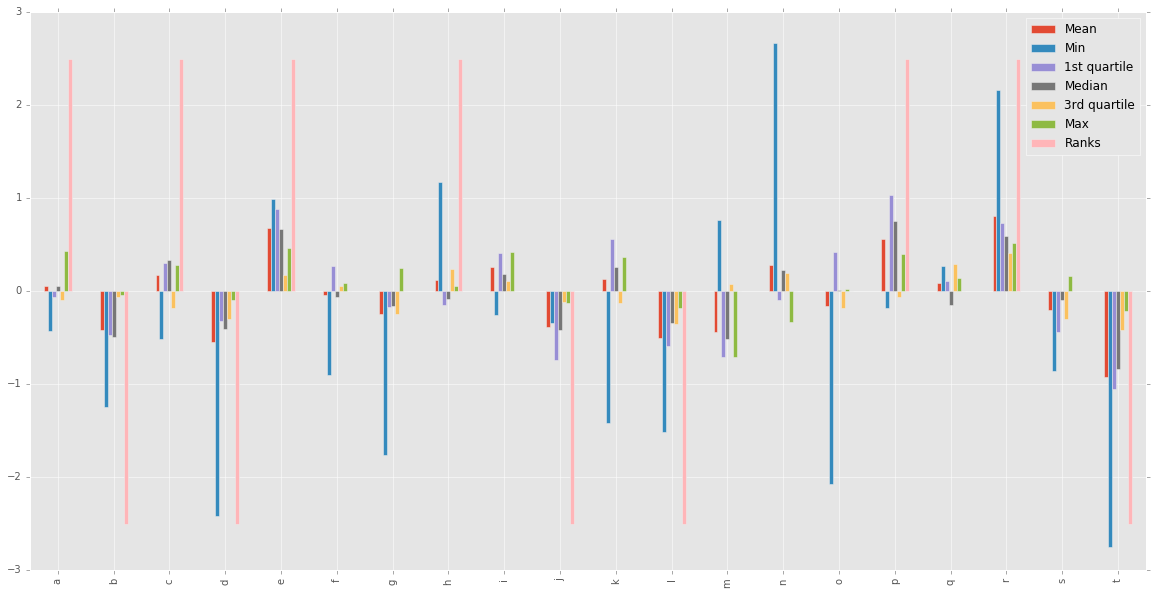

In [2]:
circuit = pd.DataFrame(index=("Mean", "Min", "1st quartile", "Median", "3rd quartile", "Max"))

circuit["a"] = [a(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
                a(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
                a(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
                a(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
                a(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
                a(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["b"] = [b(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               b(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               b(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               b(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               b(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               b(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["c"] = [c(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               c(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               c(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               c(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               c(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               c(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["d"] = [d(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               d(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               d(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               d(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               d(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               d(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["e"] = [e(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               e(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               e(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               e(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               e(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               e(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["f"] = [f(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               f(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               f(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               f(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               f(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               f(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["g"] = [g(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               g(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               g(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               g(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               g(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               g(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["h"] = [h(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               h(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               h(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               h(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               h(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               h(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["h"] = [h(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               h(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               h(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               h(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               h(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               h(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["i"] = [i(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               i(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               i(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               i(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               i(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               i(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["j"] = [j(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               j(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               j(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               j(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               j(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               j(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["k"] = [k(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               k(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               k(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               k(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               k(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               k(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["l"] = [l(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               l(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               l(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               l(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               l(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               l(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["m"] = [m(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               m(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               m(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               m(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               m(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               m(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["n"] = [n(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               n(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               n(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               n(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               n(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               n(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["o"] = [o(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               o(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               o(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               o(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               o(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               o(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["p"] = [p(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               p(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               p(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               p(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               p(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               p(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["q"] = [q(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               q(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               q(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               q(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               q(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               q(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["r"] = [r(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               r(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               r(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               r(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               r(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               r(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["s"] = [s(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               s(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               s(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               s(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               s(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               s(w000, w001, w010, w011, w100, w101, w110, w111).max_value]
circuit["t"] = [t(w000, w001, w010, w011, w100, w101, w110, w111).mean_value,
               t(w000, w001, w010, w011, w100, w101, w110, w111).min_value,
               t(w000, w001, w010, w011, w100, w101, w110, w111).Q1_value,
               t(w000, w001, w010, w011, w100, w101, w110, w111).median_value,
               t(w000, w001, w010, w011, w100, w101, w110, w111).Q3_value,
               t(w000, w001, w010, w011, w100, w101, w110, w111).max_value]

circuit_transposed = circuit.transpose()
circuit_transposed["Ranks"] = [2.5, -2.5, 2.5, -2.5, 2.5, 0, 0, 2.5, 0, -2.5, 0, -2.5, 0, 0, 0, 2.5, 0, 2.5, 0, -2.5]
print(circuit)
circuit_transposed.plot.bar(figsize=(20,10))
plt.savefig("HIV_2007_conventional_stats.pdf")

Functions to get stats from row data:

In [3]:
# Returns k closes to the means values from the given list of lists:
def closest_to_mean(fit_data_list, k, mean_type="mean"):
    if mean_type == "mean":
        means = [np.mean(fit_data_list[j]) for j in range(len(fit_data_list))]
    elif mean_type == "median":
        means = [np.median(fit_data_list[j]) for j in range(len(fit_data_list))]
    fit_data_list_copy = []
    for r in range(len(fit_data_list)):
        copy = [fit_data_list[r][l] for l in range(len(fit_data_list[r]))]
        fit_data_list_copy.append(copy)
    output = []
    for r in range(k):
        output_r = []
        for l in range(len(means)):
            close_to_mean_index = (np.abs(fit_data_list_copy[l] - means[l])).argmin()
            output_r.append(fit_data_list_copy[l][close_to_mean_index])
            del fit_data_list_copy[l][close_to_mean_index]
        output.append(output_r)
    return output

# Given data file and mutations of genotypes, returns DataFrame with equal number of replicates across genotypes.
# The number of replicates is taken to be max across genotypes, that is, = num of replicates of the genotype with
# smallest number of replicates across genotypes
def get_mean_fitness(data_file, mutations, sites, mean_type=""):
    sites = [0] + sites  # This is specific to the data file. Column 0 contains fitness, column 1 names.
    values = pd.read_csv(data_file, usecols=sites)
    values.iloc[:, 0] = np.log10(values.iloc[:, 0])
    size = len(values.iloc[:, 1])
    f000 = []
    f001 = []
    f010 = []
    f100 = []
    f011 = []
    f101 = []
    f110 = []
    f111 = []
    for s in range(size):
        if (values.iloc[s, 1] == mutations[0][0]) & (values.iloc[s, 2] == mutations[1][0]) &\
                (values.iloc[s, 3] == mutations[2][0]):
            f000.append(values.iloc[s, 0])
        elif (values.iloc[s, 1] == mutations[0][0]) & (values.iloc[s, 2] == mutations[1][0]) &\
                (values.iloc[s, 3] == mutations[2][1]):
            f001.append(values.iloc[s, 0])
        elif (values.iloc[s, 1] == mutations[0][0]) & (values.iloc[s, 2] == mutations[1][1]) &\
                (values.iloc[s, 3] == mutations[2][0]):
            f010.append(values.iloc[s, 0])
        elif (values.iloc[s, 1] == mutations[0][1]) & (values.iloc[s, 2] == mutations[1][0]) &\
                (values.iloc[s, 3] == mutations[2][0]):
            f100.append(values.iloc[s, 0])
        elif (values.iloc[s, 1] == mutations[0][0]) & (values.iloc[s, 2] == mutations[1][1]) &\
                (values.iloc[s, 3] == mutations[2][1]):
            f011.append(values.iloc[s, 0])
        elif (values.iloc[s, 1] == mutations[0][1]) & (values.iloc[s, 2] == mutations[1][0]) &\
                (values.iloc[s, 3] == mutations[2][1]):
            f101.append(values.iloc[s, 0])
        elif (values.iloc[s, 1] == mutations[0][1]) & (values.iloc[s, 2] == mutations[1][1]) &\
                (values.iloc[s, 3] == mutations[2][0]):
            f110.append(values.iloc[s, 0])
        elif (values.iloc[s, 1] == mutations[0][1]) & (values.iloc[s, 2] == mutations[1][1]) &\
                (values.iloc[s, 3] == mutations[2][1]):
            f111.append(values.iloc[s, 0])
    f = [f000, f001, f010, f011, f100, f101, f110, f111]
    sample_length = min(len(f000), len(f001), len(f010), len(f011), len(f100), len(f101), len(f110), len(f111))
    f_ctm = closest_to_mean(f, sample_length)
    f_all_combinations = []
    output = pd.DataFrame(f_ctm)
    output.columns = ["w000", "w001", "w010", "w011", "w100", "w101", "w110", "w111"]
    return output

Get data from the file:

In [4]:
HIV_data_file = "2007_HIV_data.csv"
mutations_BPS = [["L", "M"],  # mutations: L to M, M to V, t to Y
                 ["M", "V"],
                 ["t", "Y"]]
sites_BPS = [88, 244, 275]  # sites: PRO L90M, RT M184V, RT T215Y
row_data = get_mean_fitness(HIV_data_file, mutations_BPS, sites_BPS)
row_data_shuffled = get_mean_fitness(HIV_data_file, mutations_BPS, sites_BPS)

# Takes this many of possible combinations of genotypes:
num_duplicates = 60
for i in range(num_duplicates - 1):
    row_data_shuffled = row_data_shuffled.append(row_data, ignore_index = True)
np.random.shuffle(row_data_shuffled.w000)
np.random.shuffle(row_data_shuffled.w001)
np.random.shuffle(row_data_shuffled.w010)
np.random.shuffle(row_data_shuffled.w011)
np.random.shuffle(row_data_shuffled.w100)
np.random.shuffle(row_data_shuffled.w101)
np.random.shuffle(row_data_shuffled.w110)
np.random.shuffle(row_data_shuffled.w111)

T-test:

In [5]:
def a_num(a000, a001, a010, a011, a100, a101, a110, a111):
    output = a000 - a010 - a100 + a111
    return output

def b_num(b000, b001, b010, b011, b100, b101, b110, b111):
    output = b001 - b011 - b101 + b111
    return output

def c_num(c000, c001, c010, c011, c100, c101, c110, c111):
    output = c000 - c001 - c100 + c101
    return output

def d_num(d000, d001, d010, d011, d100, d101, d110, d111):
    output = d010 - d011 - d110 + d111
    return output

def e_num(e000, e001, e010, e011, e100, e101, e110, e111):
    output = e000 - e001 - e010 + e011
    return output

def f_num(f000, f001, f010, f011, f100, f101, f110, f111):
    output = f100 - f101 - f110 + f111
    return output

def g_num(g000, g001, g010, g011, g100, g101, g110, g111):
    output = g000 - g100 - g011 + g111
    return output

def h_num(h000, h001, h010, h011, h100, h101, h110, h111):
    output = h001 - h010 - h101 + h110
    return output

def i_num(i000, i001, i010, i011, i100, i101, i110, i111):
    output = i000 - i010 - i101 + i111
    return output

def j_num(j000, j001, j010, j011, j100, j101, j110, j111):
    output = j001 - j100 - j011 + j110
    return output

def k_num(k000, k001, k010, k011, k100, k101, k110, k111):
    output = k000 - k001 - k110 + k111
    return output

def l_num(l000, l001, l010, l011, l100, l101, l110, l111):
    output = l010 - l100 - l011 + l101
    return output

def m_num(m000, m001, m010, m011, m100, m101, m110, m111):
    output = -2*m000 + m001 + m010 + m100 - m111
    return output

def n_num(n000, n001, n010, n011, n100, n101, n110, n111):
    output = -n000 + n011 + n101 + n110 - 2*n111
    return output

def o_num(o000, o001, o010, o011, o100, o101, o110, o111):
    output = -o001 + o010 + o100 - 2*o110 + o111
    return output

def p_num(p000, p001, p010, p011, p100, p101, p110, p111):
    output = p000 - 2*p001 + p011 + p101 - p110
    return output

def q_num(q000, q001, q010, q011, q100, q101, q110, q111):
    output = q001 - q010 + q100 - 2*q101 + q111
    return output

def r_num(r000, r001, r010, r011, r100, r101, r110, r111):
    output = r000 - 2*r010 + r011 - r101 + r110
    return output

def s_num(s000, s001, s010, s011, s100, s101, s110, s111):
    output = s000 - 2*s100 - s011 + s101 + s110
    return output

def t_num(t000, t001, t010, t011, t100, t101, t110, t111):
    output = t001 + t010 - t100 - 2*t011 + t111
    return output

print(len(row_data_shuffled))

a_ttest = stats.ttest_1samp(a_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
b_ttest = stats.ttest_1samp(b_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
c_ttest = stats.ttest_1samp(c_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
d_ttest = stats.ttest_1samp(d_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
e_ttest = stats.ttest_1samp(e_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
f_ttest = stats.ttest_1samp(f_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
g_ttest = stats.ttest_1samp(g_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
h_ttest = stats.ttest_1samp(h_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
i_ttest = stats.ttest_1samp(i_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
j_ttest = stats.ttest_1samp(j_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
k_ttest = stats.ttest_1samp(k_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
l_ttest = stats.ttest_1samp(l_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
m_ttest = stats.ttest_1samp(m_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
n_ttest = stats.ttest_1samp(n_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
o_ttest = stats.ttest_1samp(o_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
p_ttest = stats.ttest_1samp(p_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
q_ttest = stats.ttest_1samp(q_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
r_ttest = stats.ttest_1samp(r_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
s_ttest = stats.ttest_1samp(s_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")
t_ttest = stats.ttest_1samp(t_num(row_data_shuffled.w000, row_data_shuffled.w001, row_data_shuffled.w010, row_data_shuffled.w011, row_data_shuffled.w100,
                                  row_data_shuffled.w101, row_data_shuffled.w110, row_data_shuffled.w111), 0, nan_policy="omit")

p_values = pd.DataFrame(index=["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p",
                               "q", "r", "s", "t"])
p_values["Statistic"] = [a_ttest[0], b_ttest[0], c_ttest[0], d_ttest[0], e_ttest[0], f_ttest[0], g_ttest[0],
                         h_ttest[0], i_ttest[0], j_ttest[0], k_ttest[0], l_ttest[0], m_ttest[0], n_ttest[0],
                         o_ttest[0], p_ttest[0], q_ttest[0], r_ttest[0], s_ttest[0], t_ttest[0]]
p_values["p-value"] = [a_ttest[1], b_ttest[1], c_ttest[1], d_ttest[1], e_ttest[1], f_ttest[1], g_ttest[1],
                       h_ttest[1], i_ttest[1], j_ttest[1], k_ttest[1], l_ttest[1], m_ttest[1], n_ttest[1],
                       o_ttest[1], p_ttest[1], q_ttest[1], r_ttest[1], s_ttest[1], t_ttest[1]]
result = []
for index, row in p_values.iterrows():
    if row["p-value"] < 0.05:
        if row["Statistic"] < 0:
            result.append("-")
        elif row.Statistic > 0:
            result.append("+")
    else:
        result.append("+/-")
p_values["Result"] = result
p_values["From rank order"] = ["+", "-", "+", "-", "+", "+/-", "+/-", "+", "+/-", "-", "+/-", "-",
                               "+/-", "+/-", "+/-", "+", "+/-", "+", "+/-", "-"]
print(p_values)

300
   Statistic        p-value Result From rank order
a -11.126215   2.715380e-24      -               +
b -16.836647   3.332424e-45      -               -
c   4.053256   6.446283e-05      +               +
d -33.650110  1.106609e-103      -               -
e  19.924208   8.506606e-57      +               +
f   1.426840   1.546694e-01    +/-             +/-
g -28.108506   6.379889e-86      -             +/-
h  -2.710410   7.108188e-03      -               +
i   4.943649   1.279936e-06      +             +/-
j -17.366536   3.362064e-47      -               -
k   5.349816   1.753860e-07      +             +/-
l -23.857917   3.498111e-71      -               -
m  -6.413205   5.554467e-10      -             +/-
n  20.254252   5.027054e-58      +             +/-
o   3.276693   1.173973e-03      +             +/-
p  11.768161   1.579859e-26      +               +
q  -1.518612   1.299167e-01    +/-             +/-
r  24.310568   8.524706e-73      +               +
s -15.208274   4.364768e-39